In [120]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.grid_search import GridSearchCV #sklearn0.17版本接口改变
import matplotlib.pyplot as plt
%matplotlib inline
print "done"

done


# #数据探索

In [121]:
train = pd.read_csv("D:/shareddir/PythonCode/PycharmProjects/ml/kaggle/titanic/all/train.csv")
test = pd.read_csv("D:/shareddir/PythonCode/PycharmProjects/ml/kaggle/titanic/all/test.csv")

In [129]:
#数据量
print train.shape
print test.shape

(891, 12)
(418, 11)


In [130]:
#基本的统计描述，最大值，最小值，中位数，方差，标准差等
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
#查看特征缺失情况
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [127]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [128]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 特征数据可视化，查看训练集和测试集特征分布

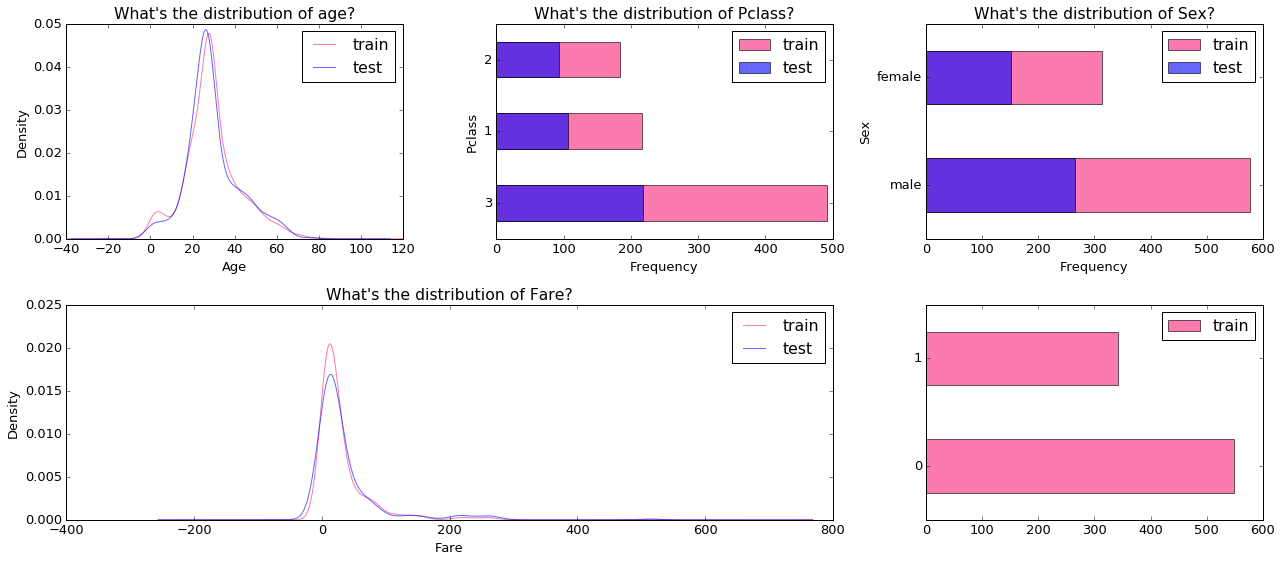

In [116]:
plt.rc('font', size=13) #matplotlib.rcParams字典变量保存了全局配置，plt.rc方法可直接修改该配置变量；本行为设置文字大小size为13
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
train.Age.fillna(train.Age.median()).plot(kind='kde', color='#FA2379', label='train', alpha=alpha) 
test.Age.fillna(test.Age.median()).plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
train.Pclass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Pclass.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
train.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Sex.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
train.Fare.fillna(train.Fare.median()).plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Fare.fillna(test.Fare.median()).plot(kind='kde', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
train.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Embarked.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')

ax6 = plt.subplot2grid((2,3), (1,2))
train.Survived.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
#test.Survived.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax5.set_ylabel('Survived')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Survived?" )
plt.legend(loc='best')

plt.tight_layout()

In [132]:
train.Survived.value_counts()
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
19.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
23.00    15
34.00    15
33.00    15
20.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
28.50     2
40.50     2
63.00     2
13.00     2
10.00     2
45.50     2
70.00     2
30.50     2
71.00     2
59.00     2
57.00     2
55.00     2
0.75      2
64.00     2
23.50     1
14.50     1
0.67      1
53.00     1
0.92      1
0.42      1
70.50     1
36.50     1
80.00     1
66.00     1
74.00     1
12.00     1
55.50     1
34.50     1
24.50     1
20.50     1
Name: Age, dtype: int64

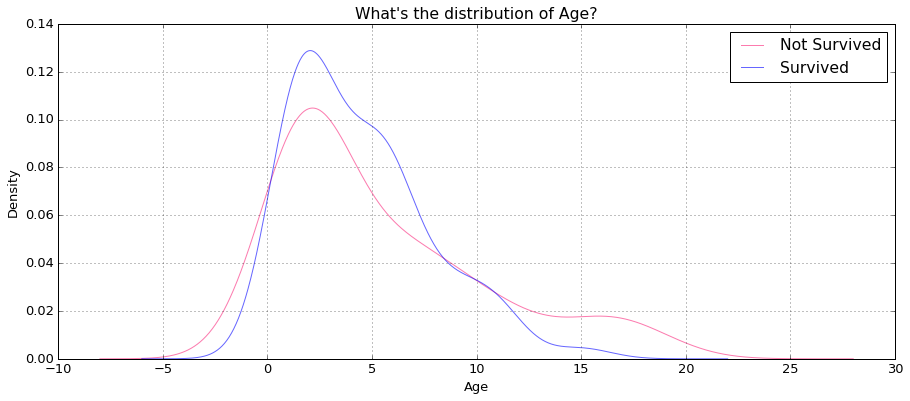

In [45]:
#plot参数使用kde与density效果一样
fig = plt.figure(figsize=(15, 6))

train[train.Survived==0].Age.value_counts().plot(kind='kde', color='#FA2379', label='Not Survived', alpha=alpha)
train[train.Survived==1].Age.value_counts().plot(kind='kde', label='Survived', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()

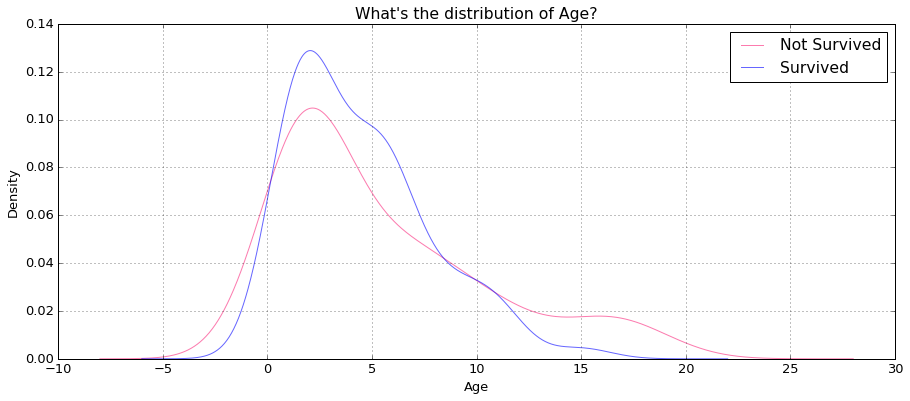

In [46]:
fig = plt.figure(figsize=(15, 6))

train[train.Survived==0].Age.value_counts().plot(kind='density', color='#FA2379', label='Not Survived', alpha=alpha)
train[train.Survived==1].Age.value_counts().plot(kind='density', label='Survived', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()

In [56]:
male_survived = train[train.Sex == "male"].Survived.value_counts()
print male_survived

0    468
1    109
Name: Survived, dtype: int64


In [69]:
#type(male_survived)
die_num = male_survived[0]
survived_num = male_survived[1]
print die_num
print survived_num
print float(die_num)/survived_num
print "ratio of die:",float(die_num)/(die_num+survived_num)

468
109
4.29357798165
ratio of die: 0.811091854419


In [57]:
female_survived = train[train.Sex == "female"].Survived.value_counts()
print female_survived

1    233
0     81
Name: Survived, dtype: int64


In [70]:
die_num = female_survived[1]
survived_num = female_survived[0]
print die_num
print survived_num
print "ratio of die:",float(die_num)/(die_num+survived_num)

233
81
ratio of die: 0.742038216561


In [73]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [74]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


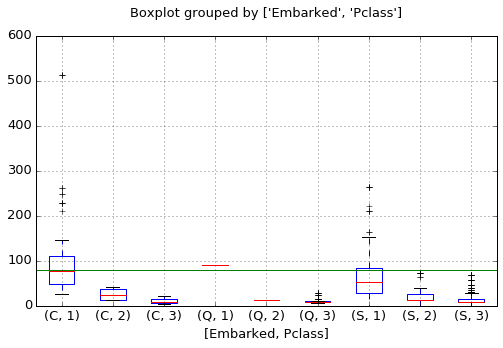

In [75]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax = train.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.axhline(y=80, color='green')
ax.set_title('', y=1.1)

train[train.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

In [82]:
_ = train.set_value(train.Embarked.isnull(), 'Embarked', 'C')

In [78]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [81]:
print ("The top 5 most common value of Fare")
#test[(test.Pclass==3)&(test.Embarked=='S')].Fare.value_counts().head()
test[(test.Pclass == 3) & (test.Embarked =="S")].Fare.value_counts()

The top 5 most common value of Fare


8.0500     17
7.7750     10
7.8958     10
7.8542      8
8.6625      8
7.9250      5
7.7958      4
14.5000     4
69.5500     4
7.2500      4
7.5500      4
16.1000     3
13.7750     3
9.5000      3
31.3875     3
22.5250     2
7.0500      2
22.0250     2
7.0000      2
46.9000     2
13.9000     2
12.1833     2
23.4500     2
7.6500      2
20.5750     2
39.6875     1
16.7000     1
7.8500      1
18.0000     1
20.2500     1
56.4958     1
8.9625      1
9.3500      1
12.2875     1
34.3750     1
7.5750      1
7.7500      1
17.4000     1
21.0750     1
15.9000     1
9.3250      1
7.5792      1
9.2250      1
15.5500     1
8.1125      1
8.7125      1
7.8875      1
14.1083     1
7.8792      1
25.4667     1
6.4958      1
20.2125     1
24.1500     1
3.1708      1
15.1000     1
14.4000     1
Name: Fare, dtype: int64

In [83]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [84]:
_ = test.set_value(test.Fare.isnull(),"Fare",8.05)

In [85]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [86]:
full = pd.concat([train,test],ignore_index = True)
full

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [88]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [92]:
full.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
B96 B98            4
F2                 4
F4                 4
C78                4
F33                4
C22 C26            4
B58 B60            3
E101               3
B51 B53 B55        3
C101               3
A34                3
E34                3
C68                2
C7                 2
C62 C64            2
E25                2
C92                2
C93                2
B77                2
B78                2
E24                2
E50                2
B35                2
D10 D12            2
C2                 2
E121               2
                  ..
A23                1
A26                1
A29                1
B24                1
C105               1
B4                 1
C128               1
D45                1
D6                 1
B3                 1
C53                1
E58                1
D34                1
B102               1
A32                1
E17                1
A16          

In [95]:
_ = full.set_value(full.Cabin.isnull(),"Cabin","U0")

In [100]:
full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.276193,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.743584,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


特征工程

In [102]:
import re
names = full.Name.map(lambda x: len(x.split()))
names

0       4
1       7
2       3
3       7
4       4
5       3
6       4
7       4
8       7
9       5
10      4
11      3
12      4
13      4
14      5
15      5
16      3
17      4
18      7
19      3
20      4
21      3
22      4
23      4
24      4
25      8
26      4
27      4
28      4
29      3
       ..
1279    3
1280    4
1281    4
1282    7
1283    4
1284    3
1285    3
1286    7
1287    3
1288    6
1289    4
1290    4
1291    3
1292    3
1293    4
1294    4
1295    4
1296    6
1297    4
1298    4
1299    4
1300    3
1301    3
1302    7
1303    4
1304    3
1305    5
1306    4
1307    3
1308    4
Name: Name, dtype: int64

In [106]:
full.Fare
full.Fare.reshape(-1,1)
full.Fare.shape

(1309L,)